In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as mpl_text

In [6]:
# read dataframe
nb_seeds = 20
results_dir = "/storage/store2/work/aheurteb/mvicad/tbme/results/results_synthetic_data/"
save_name = f"DataFrame_with_{nb_seeds}_seeds_wrt_different_filters_combinations_noise_0-05"
save_path = results_dir + save_name
df = pd.read_csv(save_path)

In [7]:
df

,Amari LBFGSB,Dilations error LBFGSB,Shifts error LBFGSB,Time LBFGSB,Amari MVICAD,Time MVICAD,Amari MVICAD ext,Time MVICAD ext,Amari permica,random_state,filter_length_squarenorm_f,use_envelop_term,number_of_filters_envelop,filter_length_envelop
0,0.002779,0.111795,0.110488,41.576413,0.006612,0.325521,0.001716,0.341079,0.049261,0,1,True,1,2
1,0.002255,0.093030,0.116797,36.272924,0.013562,0.215218,0.002224,0.345171,0.016500,1,1,True,1,2
2,0.003249,0.075322,0.081464,39.695115,0.002582,0.259977,0.001536,0.264027,0.013762,2,1,True,1,2
3,0.002344,0.081285,0.095014,38.743867,0.009720,0.303246,0.002859,0.327114,0.022568,3,1,True,1,2
4,0.001393,0.066574,0.061581,28.446227,0.003606,0.251252,0.000833,0.339770,0.010415,4,1,True,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.018799,0.043874,0.056207,42.681949,0.002951,0.339664,0.001930,0.416204,0.018819,15,15,False,0,0
2236,0.020720,0.065474,0.095388,42.046299,0.001773,0.270168,0.002534,0.370688,0.037556,16,15,False,0,0
2237,0.001590,0.049153,0.052254,39.672344,0.001101,0.346808,0.001721,0.408249,0.030626,17,15,False,0,0
2238,0.001690,0.014562,0.022336,43.103462,0.005048,0.324003,0.002348,0.410665,0.022978,18,15,False,0,0


In [8]:
# check if DataFrame can be evenly divided into batches of size nb_random_states
if len(df) % nb_seeds != 0:
    raise ValueError("The number of rows in the DataFrame should be a multiple of the \
        number of random states.")

# split the DataFrame into batches and compute the median for each batch
batches = [df[i:i + nb_seeds] for i in range(0, len(df), nb_seeds)]
batch_means = [batch.median() for batch in batches]

# combine the results into a single DataFrame
df_median = pd.DataFrame(batch_means).reset_index(drop=True)

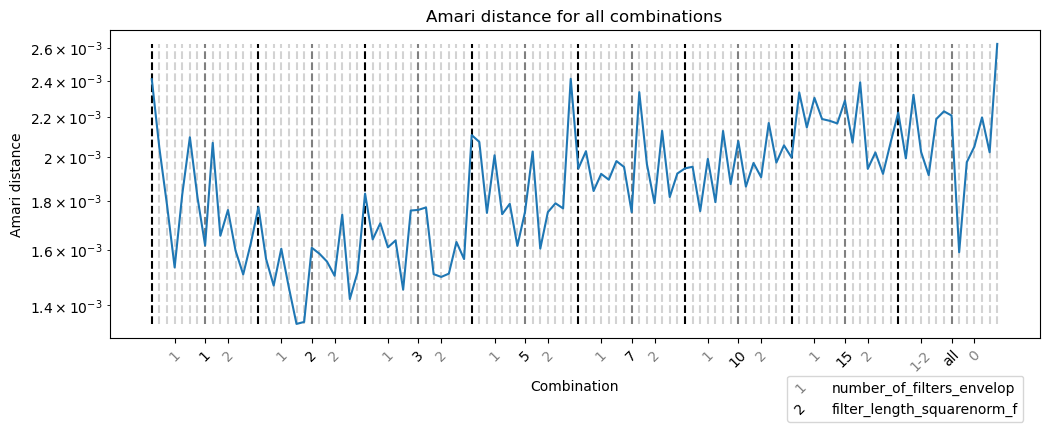

In [9]:
# xticks
# we add 1 because of the cases without envelop and withtout smoothing in the envelop
nb_double_batches = len(np.unique(df["filter_length_squarenorm_f"])) + 1
# we remove 2 because of the cases 0 and 1
batch_size = len(np.unique(df["filter_length_envelop"])) - 2
xticks_1 = np.arange(2 * nb_double_batches) * batch_size + batch_size // 2
xticks_2 = np.arange(nb_double_batches) * batch_size * 2 + batch_size
xticks = np.sort(np.concatenate([xticks_1, xticks_2]))

# xticklabels
xticklabels_1 = np.concatenate([[1, 2] * (nb_double_batches - 1), ["1-2", 0]])
xticklabels_2 = np.concatenate([np.unique(df["filter_length_squarenorm_f"]), ["all"]])
xticklabels = []
for i in range(nb_double_batches):
    xticklabels.append(xticklabels_1[2*i])
    xticklabels.append(xticklabels_2[i])
    xticklabels.append(xticklabels_1[2*i+1])

# legend
class AnyObject(object):
    def __init__(self, text, color):
        self.my_text = text
        self.my_color = color

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        patch = mpl_text.Text(
            x=0, y=0, text=orig_handle.my_text, color=orig_handle.my_color, verticalalignment=u'baseline', 
            horizontalalignment=u'left', multialignment=None, 
            fontproperties=None, rotation=45, linespacing=None, 
            rotation_mode=None)
        handlebox.add_artist(patch)
        return patch

# plot
plt.figure(figsize=(12, 4))
ax = plt.subplot()
ax.plot(np.arange(len(df_median)), df_median["Amari LBFGSB"])
for i in range(len(df_median)):
    color = "lightgrey"
    if i % 14 == 0:
        color = "black"
    elif i % 14 == 7:
        color = "grey"
    ax.vlines(x=i, ymin=np.min(df_median["Amari LBFGSB"]), ymax=np.max(df_median["Amari LBFGSB"]), linestyles="--", colors=color)
# xticks and xticklabels
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=45)
for i, xtick in enumerate(ax.get_xticklabels()):
    if i % 3 == 1:
        color = "black"
    else:
        color = "grey"
    xtick.set_color(color)
# legend
obj_0 = AnyObject("1", "grey")
obj_1 = AnyObject("2", "black")
plt.legend(
    [obj_0, obj_1], ["number_of_filters_envelop", "filter_length_squarenorm_f"],
    handler_map={obj_0:AnyObjectHandler(), obj_1:AnyObjectHandler()},
    bbox_to_anchor=(0.99, -0.1))
plt.yscale("log")
plt.xlabel("Combination")
plt.ylabel("Amari distance")
plt.title("Amari distance for all combinations")
plt.show()

In [186]:
nb_best_or_worst_combs = 4
sorted_indices = np.argsort(df_median["Amari LBFGSB"].values)[::-1]
best_combs = sorted_indices[-nb_best_or_worst_combs:][::-1]
worst_combs = sorted_indices[:nb_best_or_worst_combs]
print(f"Best combinations indexes: {best_combs}")
print(f"Worst combinations indexes: {worst_combs}")

Best combinations indexes: [57 44 43 59]
Worst combinations indexes: [105  13 111 106]


In [187]:
for i, comb in enumerate(best_combs):
    print(f"############################ Best combination {i} ############################")
    row = df.iloc[comb*nb_seeds]
    print(row.loc[["filter_length_squarenorm_f", "use_envelop_term", "number_of_filters_envelop", "filter_length_envelop"]])

############################ Best combination 0 ############################
filter_length_squarenorm_f       7
use_envelop_term              True
number_of_filters_envelop        1
filter_length_envelop            3
Name: 1710, dtype: object
############################ Best combination 1 ############################
filter_length_squarenorm_f       5
use_envelop_term              True
number_of_filters_envelop        1
filter_length_envelop            5
Name: 1320, dtype: object
############################ Best combination 2 ############################
filter_length_squarenorm_f       5
use_envelop_term              True
number_of_filters_envelop        1
filter_length_envelop            3
Name: 1290, dtype: object
############################ Best combination 3 ############################
filter_length_squarenorm_f       7
use_envelop_term              True
number_of_filters_envelop        1
filter_length_envelop           10
Name: 1770, dtype: object


In [188]:
for i, comb in enumerate(worst_combs):
    print(f"############################ Worst combination {i} ############################")
    row = df.iloc[comb*nb_seeds]
    print(row.loc[["filter_length_squarenorm_f", "use_envelop_term", "number_of_filters_envelop", "filter_length_envelop"]])

############################ Worst combination 0 ############################
filter_length_squarenorm_f        1
use_envelop_term              False
number_of_filters_envelop         0
filter_length_envelop             0
Name: 3150, dtype: object
############################ Worst combination 1 ############################
filter_length_squarenorm_f       1
use_envelop_term              True
number_of_filters_envelop        2
filter_length_envelop           25
Name: 390, dtype: object
############################ Worst combination 2 ############################
filter_length_squarenorm_f       15
use_envelop_term              False
number_of_filters_envelop         0
filter_length_envelop             0
Name: 3330, dtype: object
############################ Worst combination 3 ############################
filter_length_squarenorm_f        2
use_envelop_term              False
number_of_filters_envelop         0
filter_length_envelop             0
Name: 3180, dtype: object


Potential conclusion with 10 seeds and noise_data=0.01:
- filter_length_squarenorm_f: it shouldn't be 1 (except if nb_filters_envelop=1 and filter_length_envelop=1); there is no clear difference between the other cases filter_length_squarenorm_f=2, 3, 5, 7, 10 and 15.
- use_envelop_term: it should absolutely be True.
- number_of_filters_envelop: no clear evidence.
- filter_length_envelop: it should be low (1, 2, 3, or 5).

Potential conclusion with 30 seeds and noise_data=0.01:
- filter_length_squarenorm_f: it should be anything except 1.
- use_envelop_term: it should absolutely be True.
- number_of_filters_envelop: no clear evidence.
- filter_length_envelop: it should be low (1, 2, 3, or 5, and particularly 2 or 3) -> each batch starts with a U-shape.

Potential conclusion with 20 seeds and noise_data=0.03:
- filter_length_squarenorm_f: it should be 1, 2 or 3 (5 is okay too but unstable).
- use_envelop_term: it should be True.
- number_of_filters_envelop: no clear evidence.
- filter_length_envelop: no clear evidence (except that it shouldn't be 1).

Potential conclusion with 20 seeds and noise_data=0.05:
- filter_length_squarenorm_f: it should be 2 (or maybe 3).
- use_envelop_term: it should be True.
- number_of_filters_envelop: no clear evidence.
- filter_length_envelop: no clear evidence, except that it shouldn't be 1 (and we should probably avoid 2).

Final conclusion -> I will use:
- filter_length_squarenorm_f=2
- use_envelop_term=True
- number_of_filters_envelop=1
- filter_length_envelop=5